In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [231]:
#!pip install xlrd

# Machine Learning Models
---

In this lab, we'll cover a few machine learning models to make classification predictions. We'll start with the k-nearest neighbors classifier, which you should have seen in Data 8, then move to a couple more models. Note that the models that we work with are solely for classification. Numerical predictions will require different [models](https://scikit-learn.org/stable/supervised_learning.html).

1. [K-Nearest Neighbors](#knn)
2. [Decision Trees](#decisiontree)
3. [Random Forest](#randforest)
4. [Support Vector Classification](#svc)

## Data Cleaning & Preparation

This notebook will use credit card default data from Taiwan. You can find the original data and a description of the data [here](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients).

In [194]:
data = pd.read_excel("credit_card_defaults.xls",  header=1, dtype=np.int64)
data.head(4)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Cleaning the Dataset

You might have noted that the first column and the first row of our original data look a little funky. In the next few cells, we remedy this by dropping the column "Unnamed: 0" and replacing the current column names with the values in the first row.

First, we drop the first column, which was the original index.

In [195]:
clean = data.drop(data.columns[0], axis=1)
clean.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


Then, we can collect all of the variable names


In [196]:
variables = clean.iloc[0].to_dict()
print("Some Keys: ", list(variables.keys())[:5])
print("Some Values: ", list(variables.values())[:5])
variables

Some Keys:  ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']
Some Values:  [20000, 2, 2, 1, 24]


{'LIMIT_BAL': 20000,
 'SEX': 2,
 'EDUCATION': 2,
 'MARRIAGE': 1,
 'AGE': 24,
 'PAY_0': 2,
 'PAY_2': 2,
 'PAY_3': -1,
 'PAY_4': -1,
 'PAY_5': -2,
 'PAY_6': -2,
 'BILL_AMT1': 3913,
 'BILL_AMT2': 3102,
 'BILL_AMT3': 689,
 'BILL_AMT4': 0,
 'BILL_AMT5': 0,
 'BILL_AMT6': 0,
 'PAY_AMT1': 0,
 'PAY_AMT2': 689,
 'PAY_AMT3': 0,
 'PAY_AMT4': 0,
 'PAY_AMT5': 0,
 'PAY_AMT6': 0,
 'default payment next month': 1}

You can also assign the explanatory columns directly 

In [197]:

print(model_data.columns)

X = model_data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE']].astype(int)  

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


Finally, we relabel our column names with the variables that were originally in the first row of our data.

### Working with a Subset of Our Data

Our dataset looks a little cleaner now. Next, take a look at how many entries are in our dataset. There are a large number of entries, which is great! However, DataHub can only do so much computation, so we'll take a random sample of 10,000 entries for this lab.

In [198]:
# look at the number of entries in our dataset
data.shape[0]

30000

In [199]:
# take a sample of our data
model_data = clean.sample(n=10000, random_state=42)
model_data.head(4)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2308,30000,1,2,2,25,0,0,0,0,0,...,12580,13716,14828,1500,2000,1500,1500,1500,2000,0
22404,150000,2,1,2,26,0,0,0,0,0,...,101581,77741,77264,4486,4235,3161,2647,2669,2669,0
23397,70000,2,3,1,32,0,0,0,0,0,...,69753,70111,70212,2431,3112,3000,2438,2500,2554,0
25058,130000,1,3,2,49,0,0,0,0,0,...,16898,11236,6944,1610,1808,7014,27,7011,4408,0


### Preparing the Data for an ML Model

Finally, the last thing we do is split our data into a training and test set. The training set will help us make our model, and the test set will evaluate how well our model works. 

Next, we'll split our data into `X` and `y` variables. Our `X` variable will be a dataset full of every variable but "payment next month", the last column in our table. The `y` variable will have the "payment next month" variable.

**Note:** The following lines of code have `astype(int)` at the end. Our data is not originally inputted as integers, so we need to make sure that they are!

In [200]:

X = model_data[list(variables.keys())[0:-1]].astype(int) 
y = model_data[list(variables.keys())[-1]].astype(int)

Now that we have our `X` and `y` variables, we can split them into training and test sets. The next cell does a random 80/20 split of our data into these two sets. Notice that there are four outputs from `train_test_split`, which we assign to `X_train`, `X_test`, `y_train`, and `y_test`.

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
# double check that we split the train set
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X train shape:  (8000, 23)
y train shape:  (8000,)
X test shape:  (2000, 23)
y test shape:  (2000,)


## 1. K-Nearest Neighbors Classifier <a id='knn'></a>
---




### Specifying Hyperparameters

Let's start by creating a k-nearest neighbors classifier where $k=3$. We'll use the `KNeighborsClassifier` model from the scikit-learn library, which has a multitude of models you could use.

Fill in the first blank to specify your hyperparameter (in this case, the value of `k`). Then, use this [page](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to create the classifier. Please reference this page for the remainder of this section. You may find the "Examples" section helpful, but please also read through the "Parameters", "Attributes", and "Methods" sections.

In [203]:
from sklearn.neighbors import KNeighborsClassifier

In [204]:
k = 3 

knn = KNeighborsClassifier(n_neighbors=k) 

### Training the Model on Your Data

Note that our `knn` model has not yet "trained" on any data, as we have not given it any data to train on.

Fit our model to the data we would like to train on. Your code should make use of your `X_train` dataset and your `y_train` dataset.

In [205]:

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Making Predictions

After running your cell, you should see a blue box with "KNeighborsClassifer" on it. This indicates that our computer has prepared a model based on our specifications (ie. hyperparameters) and trained it. In other words, our model is now ready to make predictions!

In this section, let's make predictions for our test set. Refer back to the documentation provided earlier.

Your cell will create a light red box with an error message, but feel free to ignore it.

In [206]:
y_pred = knn.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

### Calculating Accuracy

Now that we've made predictions for our test set, we should calculate the accuracy of our model. Take a look at the documentation for `accuracy_score` [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). Use this function to calculate the accuracy score, and recall that accuracy is computed as follows.

$$accuracy = \frac{\#\:of\:correct\:predictions}{\#\:of\:predictions}$$

In [207]:
from sklearn.metrics import accuracy_score

In [208]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


### Creating a Confusion Matrix

Accuracy isn't the only metric to measure how well our model works. We can also evaluate our model by looking at a confusion matrix. Again, take a look at the relevant scikit-learn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and create a confusion matrix.

In [209]:
from sklearn.metrics import confusion_matrix

In [210]:
# print confusion matrix
confusion_matrix_knn = confusion_matrix(y_test, y_pred) # SOLUTION
print(confusion_matrix_knn)

[[1382  212]
 [ 294  112]]


## 2. Decision Tree Classifier <a id='decisiontree'></a>
---



### Specifying Hyperparameters

Now let's make a decision tree classifier! We imported another scikit-learn model (`DecisionTreeClassifier`) for you below. See this [page](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the official documentation and reference it for the remainder of this section.

Create a `DecisionTreeClassifier` with a maximum depth of 5 and ensure that it does _not_ split on any nodes with 3 datapoints or less.

In [211]:
from sklearn.tree import DecisionTreeClassifier

In [212]:
# specify the hyperparameter(s) & train the model
max_depth = 5 
min_split = 4 

tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_split) 

### Training the Model & Making Predictions

Then, fit the model to your data. This should be similar to what you wrote for your `KNeighborsClassifier`.

In [213]:
# fit the model to our data
tree.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5, min_samples_split=4)

Once again, you should see a blue box with "DecisionTreeClassifier" written on it. Make some predictions using this model, and assign those predictions to the variable `y_pred`.

In [214]:
# make predictions
y_pred = tree.predict(X_test) 

### Measuring Goodness

Finally, let's measure the goodness of our model. Calculate and print the accuracy of our model, then create and print a confusion matrix.

In [215]:
# print accuracy score
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


In [216]:
# print confusion matrix
confusion_matrix_tree = confusion_matrix(y_test, y_pred) 
print(confusion_matrix_tree)

[[1514   80]
 [ 256  150]]


# Print the Tree

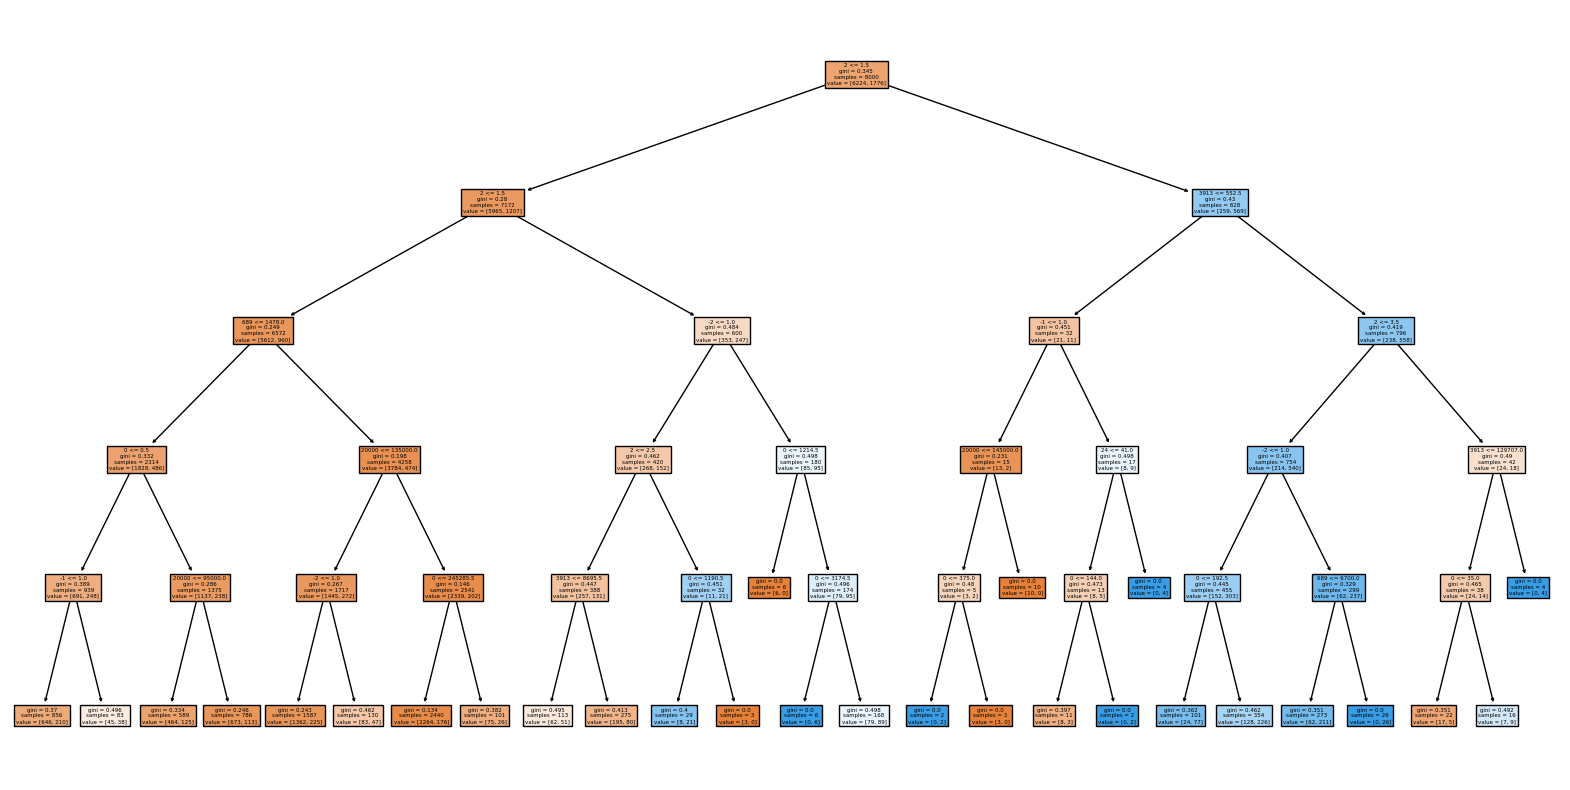

In [217]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=list(variables.values())[0:-1])
plt.show()


## 3. Random Forest <a id='randforest'></a>
---




Next, let's work with a random forest. Recall that a random forest is composed of _multiple_ decision trees that split nodes on different variables. When making predictions, it has each decision tree make its own prediction and then outputs the majority class as its final prediction.

See this [page](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the official documentation of scikit-learn's `RandomForestClassifier`. We'll repeat the process above by ...

1. Specifying the Hyperparameters

2. Training the Model & Making Predictions

3. Measuring Goodness

Specify a maximum depth of 5, split on nodes with only 4 or more values, use 10 decision trees, and only consider 1 feature when splitting.

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [219]:
# specify the hyperparameter(s) & train the model
max_depth = 5 
min_split = 4 
num_estimators = 10 
max_fts = 1 

forest = RandomForestClassifier(max_depth=max_depth, n_estimators=num_estimators, max_features=max_fts) # SOLUTION

In [220]:
# fit the model to our data
forest.fit(X_train, y_train) 

RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)

In [221]:
# make predictions
y_pred = forest.predict(X_test)

In [222]:
# print accuracy score
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [223]:
# print confusion matrix
confusion_matrix_forest = confusion_matrix(y_test, y_pred) 
print(confusion_matrix_forest)

[[1581   13]
 [ 347   59]]


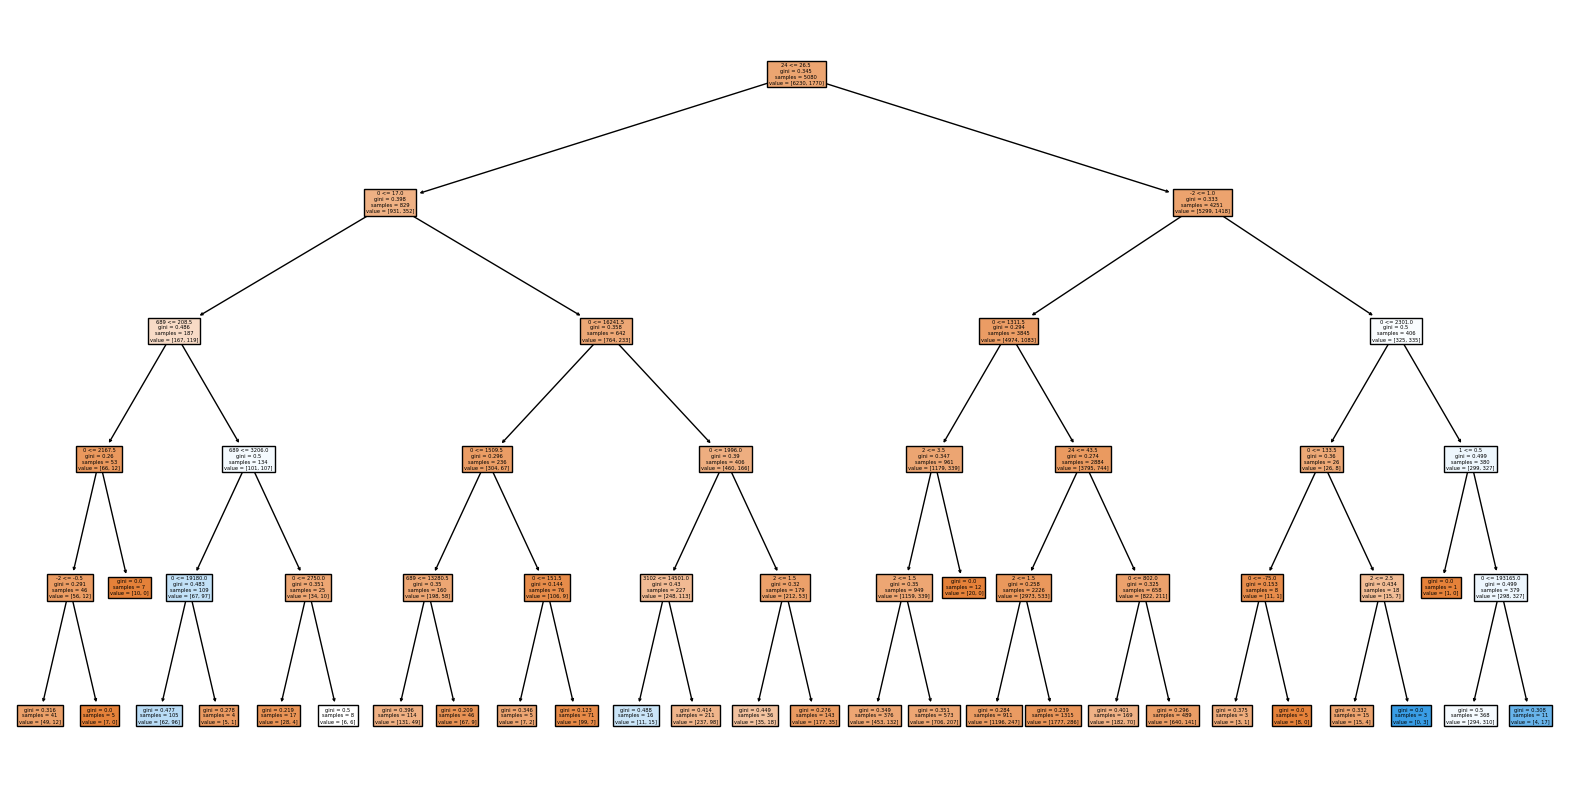

In [224]:
# print tree    
plt.figure(figsize=(20, 10))
plot_tree(forest.estimators_[0], filled=True, feature_names=list(variables.values())[0:-1])
plt.show()

## 4. Support Vector Classification <a id='svc'></a>
---
Lastly, we'll work with support vector classification. Reference this [page](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for the official documentation and repeat the steps above.

Make your regularization hyperparameter 1, then try out different values.

TODO make more complicated, clarify hyperparameters


In [225]:
from sklearn.svm import SVC

In [226]:
# specify the hyperparameter(s) & train the model
reg_param = 5

svc = SVC(C=reg_param) 

In [227]:
# fit the model to our data
svc.fit(X_train, y_train) 

SVC(C=5)

In [228]:
# make predictions
y_pred = svc.predict(X_test) 

In [229]:
# print accuracy score
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


In [230]:
# print confusion matrix
confusion_matrix_forest = confusion_matrix(y_test, y_pred) 
print(confusion_matrix_forest)

[[1593    1]
 [ 405    1]]
